In [1]:
# install pre-requisites
%pip install matplotlib
%pip install pydot
%pip install tqdm

In [2]:
# import necessary modules
import mutorch
from mutorch import nn, optim, losses
from tqdm.notebook import tqdm
# visualization
import matplotlib
import matplotlib.pyplot as plt

## Working with individual nodes

Node(name=sigmoid+fgt8, op=sigmoid, value=0.4611816223646706, grad=1.0)


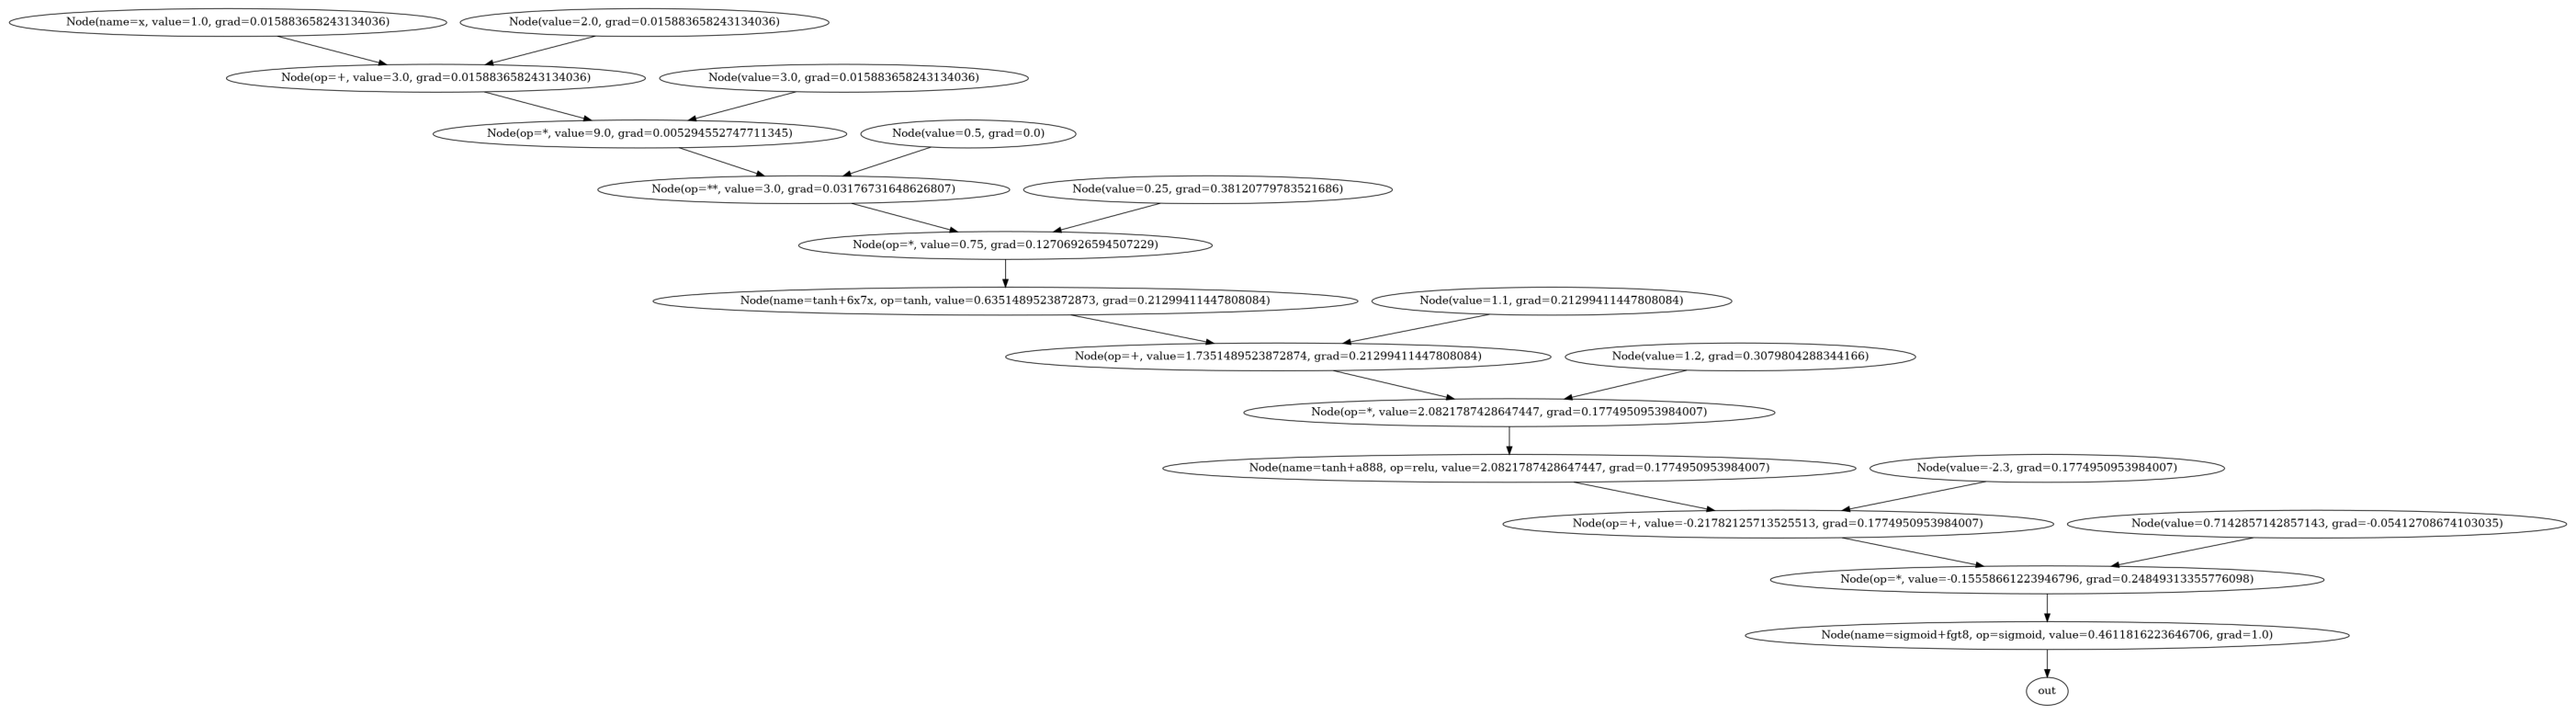

In [3]:
from mutorch import Node

# define a node and perform some operations
x = Node(1, name='x', requires_grad=True)
x = x + 2
x = x * 3
x = x ** 0.5
x = x / 4
x = nn.Tanh()(x)
y = (x + 1.1) * 1.2
x = nn.ReLU()(y)
x = (x - 2.3) / 1.4
x = nn.Sigmoid()(x)
# perform a backward pass
x.backward()
# print the final node and gradients
print(x)

# draw the computational graph
x.draw_graph(filename='node_graph')
graph = plt.imread('node_graph.png')

plt.figure(figsize=(50, 50))
plt.imshow(graph)
plt.axis('off')
plt.show()

## Working with Tensors

In [4]:
# define tensors and perform some operations
x = mutorch.Tensor([[1,2,3,4,5],
                    [2,3,4,5,6]])
w = mutorch.Tensor([[1.0, 1.1, 1.2, 1.3, 1.4], 
                    [2.0, 2.1, 2.2, 2.3, 2.4]])
bias = mutorch.Tensor([[1.0, 2.0, 3.0, 4.0, 5.0],
                       [2.0, 3.0, 4.0, 5.0, 6.0]])  
z = ( x * w ) + bias
z = z / 2.2
z = nn.Tanh()(z)
# perform backward pass
z.backward()
# print the final tensor and gradients
print(z)

Tensor(shape=(2, 5), 
	data=[[Node(op=tanh, value=0.7206956331664799, grad=0.0), Node(op=tanh, value=0.9570090018249322, grad=0.0), Node(op=tanh, value=0.9950547536867305, grad=0.0), Node(op=tanh, value=0.9995337191162993, grad=0.0), Node(op=tanh, value=0.9999634182845244, grad=0.0)]
	[Node(op=tanh, value=0.9914827858961799, grad=0.0), Node(op=tanh, value=0.999574229965115, grad=0.0), Node(op=tanh, value=0.9999823226304781, grad=0.0), Node(op=tanh, value=0.9999993881955461, grad=0.0), Node(op=tanh, value=0.9999999823460692, grad=0.0)])], requires_grad=True)


## Building a Sequential model

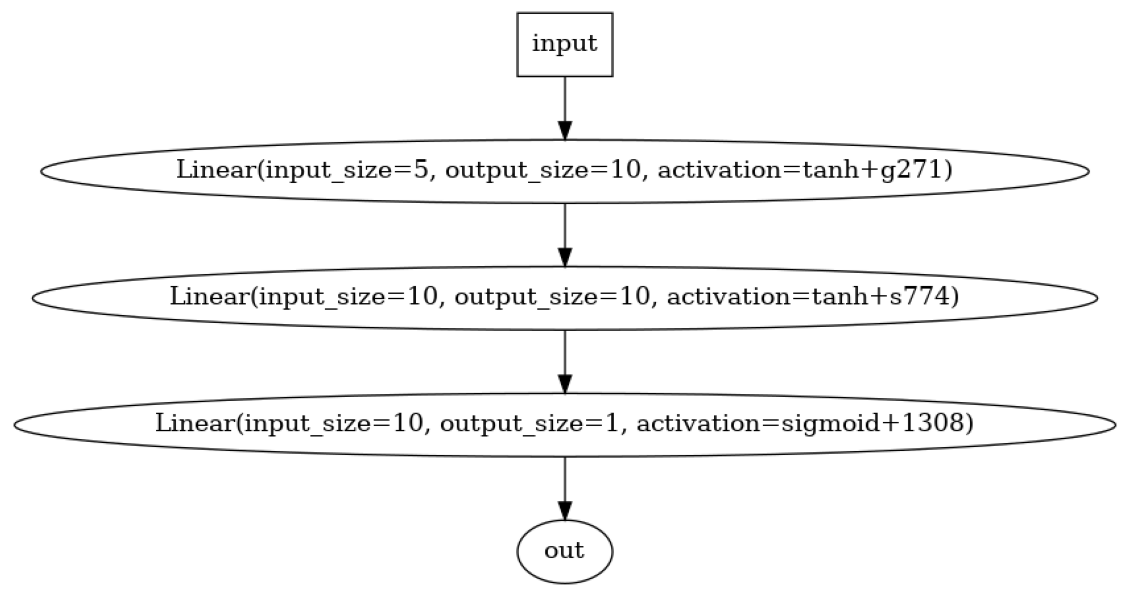

In [5]:
# define a sequential neural network with non-linear activation
model = nn.Sequential(
            nn.Linear( input_size=5, output_size=10, activation=nn.Tanh() ),
            nn.Linear( input_size=10, output_size=10, activation=nn.ReLU() ),
            nn.Linear( input_size=10, output_size=1, activation=nn.Sigmoid() )
        )
# define an example input tensor with batch size 2
x = [[1,2,3,4,5], [2,3,4,5,6]]
# perform a forward pass
y = model( x )
# y.backward()
# visualize the model
model.draw_graph(filename='sequential_graph')
graph = plt.imread('sequential_graph.png')

plt.figure(figsize=(20, 20))
plt.imshow(graph)
plt.axis('off')
plt.show()

## Defining a dataset, optimizer, and training the model

In [6]:
## build a dataset
# input tensor
x = mutorch.Tensor([[0.6, -0.35,  0.47,  0.71,  0.12],
                    [0.3,  0.45, -0.67, -0.89,  0.23],
                    [0.5,  0.65,  0.87,  0.99,  0.34],
                    [0.7, -0.85,  0.97, -0.11,  0.45],
                    [0.9, -0.01, -0.13,  0.25, -0.56],
                    [-0.2, 0.32, -0.54,  0.76,  0.98]])
# ground truth
y = mutorch.Tensor([[0.0], 
                    [0.0], 
                    [0.0], 
                    [1.0], 
                    [1.0], 
                    [1.0]])

In [7]:
# define an optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = losses.MSELoss()
epochs = 500

# print model parameters
print(f'{"#" * 20} Model parameters {"#" * 20}')
print(model)
print(f'Number of parameters: {model.num_parameters()}')

#################### Model parameters ####################
Sequential(
	Linear(input_size=5, output_size=10, activation=tanh+g271)
	Linear(input_size=10, output_size=10, activation=tanh+s774)
	Linear(input_size=10, output_size=1, activation=sigmoid+1308))
Number of parameters: 181


In [8]:
## training the model
# print ground truth and initial prediction
print('Ground truth: ', y.items())
print('Model output before training: ', model(x).items())
print(f'{"#" * 20} Starting model training...')

pbar = tqdm(range(epochs))
for epoch in pbar:
    # reset the gradients
    optimizer.zero_grad()
    # perform a forward pass
    y_pred = model(x)
    # compute the loss
    loss = loss_fn(y_pred, y)
    # perform a backward pass
    loss.backward()
    # update the parameters
    optimizer.step()
    # update the progress bar
    pbar.set_description(f'Epoch {epoch+1}/{epochs} - Loss: {loss.item():.6f}')

print(f'{"#" * 20} Training complete!')
print('Model output after training: ', model(x).items())

Ground truth:  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
Model output before training:  [0.7813147190926951, 0.36607759188981764, 0.6155997217544138, 0.8007428363310212, 0.8209332859783316, 0.15375929737837746]
#################### Starting model training...


  0%|          | 0/500 [00:00<?, ?it/s]

#################### Training complete!
Model output after training:  [0.010416691926404861, 0.02215151526193959, 0.006453991425270543, 0.985240172105086, 0.9912416693385891, 0.990853643185423]


In [9]:
# save the model
model_weights = 'weights.pt'
model.save(model_weights)

# define a new model and load weights
model = nn.Sequential(
            nn.Linear( input_size=5, output_size=10, activation=nn.Tanh() ),
            nn.Linear( input_size=10, output_size=10, activation=nn.ReLU() ),
            nn.Linear( input_size=10, output_size=1, activation=nn.Sigmoid() )
        )
model.load(model_weights)
print('Model output after loading weights: ', model(x).items())

Model output after loading weights:  [0.010416691926404861, 0.02215151526193959, 0.006453991425270543, 0.985240172105086, 0.9912416693385891, 0.990853643185423]
